In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
print(train.shape)

(10886, 12)


In [7]:
print(test.shape)

(6493, 9)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


  * **datetime** - 시간
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4)
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일 X
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일 X
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨 또는 아주 약간의 구름
    * 2: 약간의 안개와 구름
    * 3: 약간의 눈, 비가 오거나 천둥
    * 4: 아주 많은 비가 오거나 우박
  * **temp** - 온도. 섭씨(Celsius)
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)

### Explore & 전처리

#### datetime
- 데이터 타입이 object이므로 시계열 타입으로 바꾼 후 분석해보자

In [4]:
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


- 연,월,일,시,분,초 별로 대여량이 다를 것이다.
- 만일 성장하는 기업이라면 시간이 갈수록 전체적인 대여량이 증가할 것이다.
- 요일별로 대여량 추이가 달라질 수 있으므로 요일 컬럼도 추가하여 분석해보자

In [17]:
### 연,월,일,시,분,초 로 나눈 후 시각화하자

In [5]:
train["datetime(year)"] = train["datetime"].dt.year
train["datetime(month)"] = train["datetime"].dt.month
train["datetime(day)"] = train["datetime"].dt.day
train["datetime(hour)"] = train["datetime"].dt.hour
train["datetime(minute)"] = train["datetime"].dt.minute
train["datetime(second)"] = train["datetime"].dt.second

In [6]:
test["datetime(year)"] = test["datetime"].dt.year
test["datetime(month)"] = test["datetime"].dt.month
test["datetime(day)"] = test["datetime"].dt.day
test["datetime(hour)"] = test["datetime"].dt.hour
test["datetime(minute)"] = test["datetime"].dt.minute
test["datetime(second)"] = test["datetime"].dt.second

<AxesSubplot:xlabel='datetime(second)', ylabel='count'>

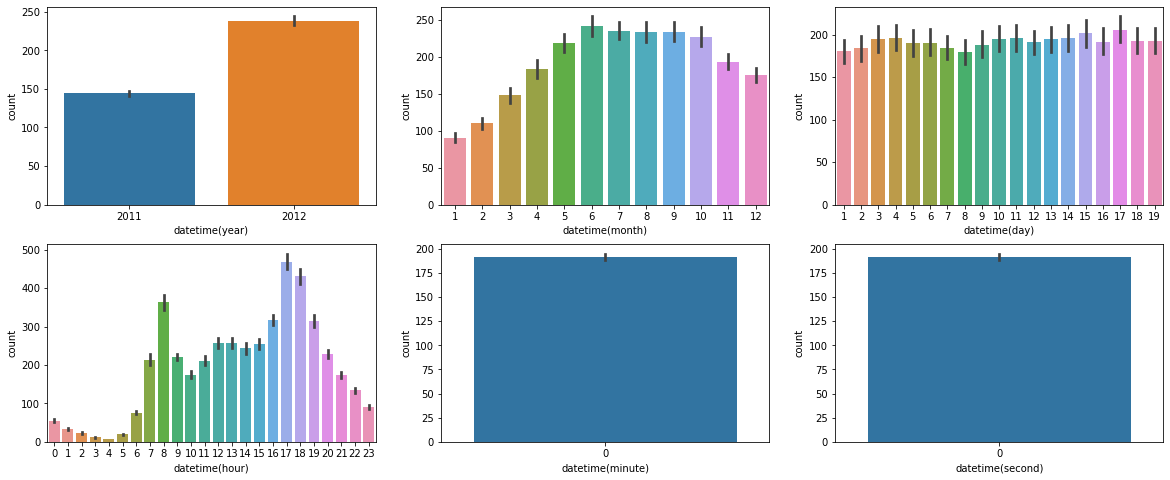

In [21]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols = 3, nrows = 2)
figure.set_size_inches((20, 8))

sns.barplot(data = train, x = "datetime(year)", y = "count", ax = ax1)
sns.barplot(data = train, x = "datetime(month)", y = "count", ax = ax2)
sns.barplot(data = train, x = "datetime(day)", y = "count", ax = ax3)
sns.barplot(data = train, x = "datetime(hour)", y = "count", ax = ax4)
sns.barplot(data = train, x = "datetime(minute)", y = "count", ax = ax5)
sns.barplot(data = train, x = "datetime(second)", y = "count", ax = ax6)

- 분, 초는 의미없으며, day자체는 큰의미는 없다.
- 하지만 뒤에서 근무일, 휴일, 요일에 따라추이가 달라질 수 있다.
- 연, 월, 시에 따른 대여량 변화가 의미있게 나타난다.
- 2011년보다 2012년에 평균 대여량이 증가한 것으로 보아 이 기업은 점점 성장하고 있음을 알 수 있다.
- 연도별로 month, hour에 따른 대여량을 살펴보자

<AxesSubplot:xlabel='datetime(month)', ylabel='count'>

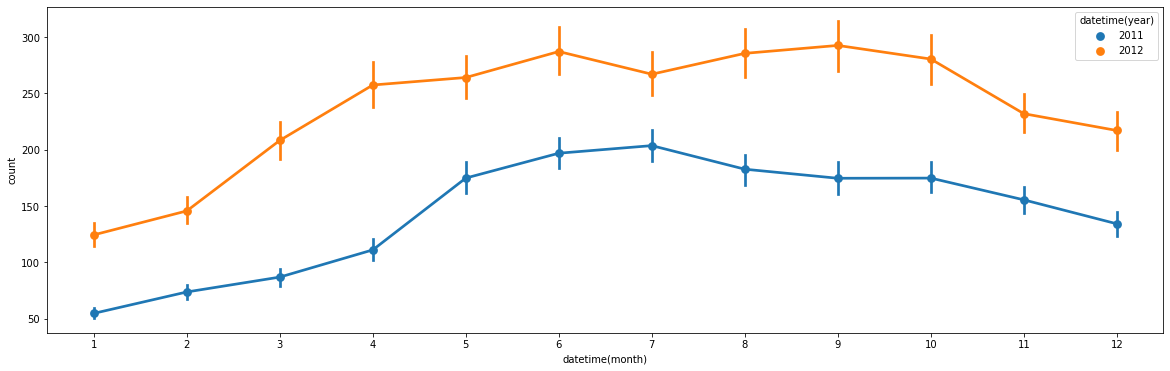

In [23]:
plt.figure(figsize = (20, 6))
sns.pointplot(data = train, x = "datetime(month)", y = "count", hue = "datetime(year)")

<AxesSubplot:xlabel='datetime(hour)', ylabel='count'>

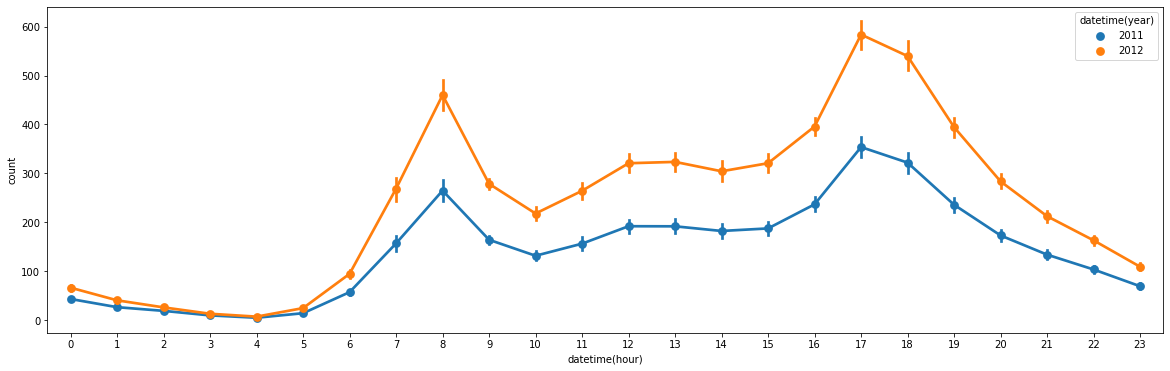

In [24]:
plt.figure(figsize = (20, 6))
sns.pointplot(data = train, x = "datetime(hour)", y = "count", hue = "datetime(year)")

- 전체적으로 성장하고 있다는 것이 확인이 되었다
- 달별로 보면 1~3월에 대여량이 적으며, 4월의 경우 급격한 증가가 있었음을 알 수 있다. (계절별로 살펴보면 좋을 듯 하다)
- hour별로 보면 출근시간인 7-8시와 퇴근시간인 5-6시에 대여량이 많다는 것을 알 수 있다.(근무일, 휴일을 따로 나눌 필요가 있다.)

#### season

In [25]:
train["season"].unique()

array([1, 2, 3, 4], dtype=int64)

- datetime에서 나타나듯 1-3월쪽에 대여량이 적다. 따라서 날씨가 추운 겨울과 매우 더운 여름에 대여량이 적을 것이다.
- month 데이터와 함께 살펴본 후 적절한 전처리가 필요한 지 판단해보자

<AxesSubplot:xlabel='season', ylabel='count'>

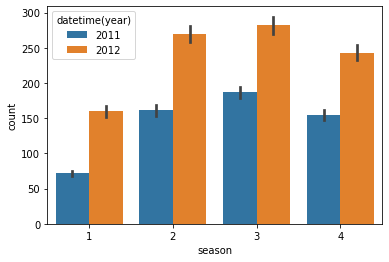

In [30]:
sns.barplot(data = train, x = "season", y = "count", hue = "datetime(year)")

In [7]:
train["spring"] = train["season"] == 1
train["summer"] = train["season"] == 2
train["fall"] = train["season"] == 3
train["winter"] = train["season"] == 4

test["spring"] = test["season"] == 1
test["summer"] = test["season"] == 2
test["fall"] = test["season"] == 3
test["winter"] = test["season"] == 4

In [27]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime(year),datetime(month),datetime(day),datetime(hour),datetime(minute),datetime(second)
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0,0


- 내가알기론 봄은 3,4,5 여름은 6,7,8 가을은 9, 10 ,11, 겨울은 12, 1, 2월 이므로 새로 변경하여 살펴보자

In [8]:
def clean_season(month):
    if (month == 3) or (month == 4) or (month == 5):
        return 1
    elif (month == 6) or (month == 7) or (month == 8):
        return 2
    elif (month == 9) or (month == 10) or (month == 11):
        return 3
    else:
        return 4
    
train["season(clean)"] = train["datetime(month)"].apply(clean_season)

train["season(clean)"].unique()

array([4, 1, 2, 3], dtype=int64)

<AxesSubplot:xlabel='season(clean)', ylabel='count'>

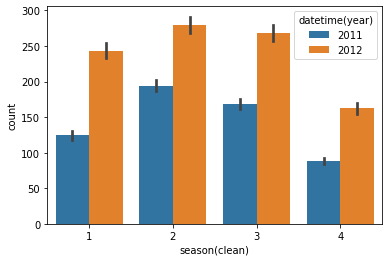

In [31]:
sns.barplot(data = train, x = "season(clean)", y = "count", hue = "datetime(year)")

- 그런데 겨울의 경우 해가 넘어가는 수치가 있어 정확한 비교가 어렵다 따라서 2달 단위로 쪼갠 후 살펴보자(1-2, 3-4, 5-6, 7-8, 9-10, 11-12)

In [9]:
def clean2_season(month):
    if (month == 1) or (month == 2) :
        return 1
    elif (month == 3) or (month == 4):
        return 2
    elif (month == 5) or (month == 6) :
        return 3
    elif (month == 7) or (month == 8): 
        return 4
    elif (month == 9) or (month == 10): 
        return 5
    else:
        return 6
    
train["season(clean2)"] = train["datetime(month)"].apply(clean2_season)

train["season(clean2)"].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [10]:
test["season(clean2)"] = test["datetime(month)"].apply(clean2_season)

<AxesSubplot:xlabel='season(clean2)', ylabel='count'>

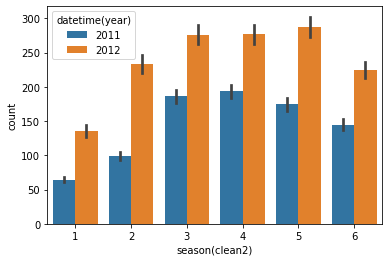

In [34]:
sns.barplot(data = train, x = "season(clean2)", y = "count", hue = "datetime(year)")

In [11]:
train["season(1-2)"] = (train["season(clean2)"] == 1) | (train["season(clean2)"] == 2)
train["season(3-4)"] = (train["season(clean2)"] == 3) | (train["season(clean2)"] == 4)
train["season(5-6)"] = (train["season(clean2)"] == 5) | (train["season(clean2)"] == 6)
train["season(7-8)"] = (train["season(clean2)"] == 7) | (train["season(clean2)"] == 8)
train["season(9-10)"] = (train["season(clean2)"] == 9) | (train["season(clean2)"] == 10)
train["season(11-12)"] = (train["season(clean2)"] == 11) | (train["season(clean2)"] == 12)

test["season(1-2)"] = (test["season(clean2)"] == 1) | (test["season(clean2)"] == 2)
test["season(3-4)"] = (test["season(clean2)"] == 3) | (test["season(clean2)"] == 4)
test["season(5-6)"] = (test["season(clean2)"] == 5) | (test["season(clean2)"] == 6)
test["season(7-8)"] = (test["season(clean2)"] == 7) | (test["season(clean2)"] == 8)
test["season(9-10)"] = (test["season(clean2)"] == 9) | (test["season(clean2)"] == 10)
test["season(11-12)"] = (test["season(clean2)"] == 11) | (test["season(clean2)"] == 12)

- 전체적으로 보니 2011년보다 2012년이 상승하는데 합쳐서 살펴보면 좋지않을까??

<AxesSubplot:xlabel='datetime(month)(clean)', ylabel='count'>

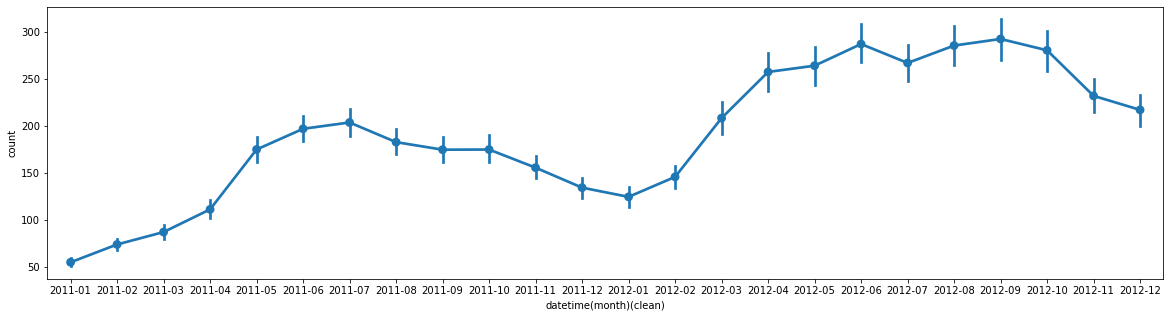

In [37]:
train["datetime(month)(clean)"] = train["datetime"].dt.strftime("%Y-%m")
plt.figure(figsize = (20, 5))
sns.pointplot(data = train , x = "datetime(month)(clean)", y = "count")

- 전체적으로 성장하는 추이를 볼 수 있다.

#### holiday, workingday
- 공휴일과 근무일의 추이는 다를 것이다. 공휴일은 낮에, 근무일에는 출퇴근 시간에 대여량이 많을 것이다.
- 좀 더 구체적으로 요일 컬럼을 만들어 비교해보면 좋을 것이다.

<AxesSubplot:xlabel='datetime(hour)', ylabel='count'>

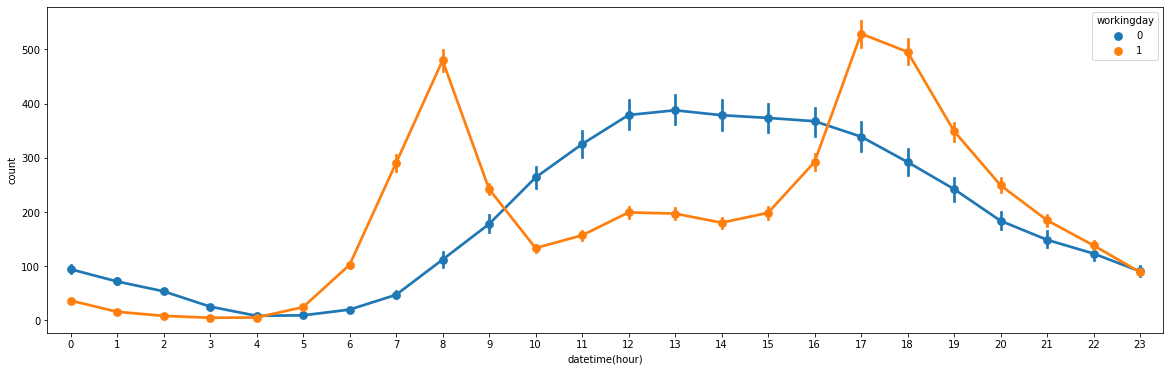

In [40]:
plt.figure(figsize = (20, 6))
sns.pointplot(data = train, x = "datetime(hour)", y = "count", hue = "workingday")

<AxesSubplot:xlabel='datetime(hour)', ylabel='count'>

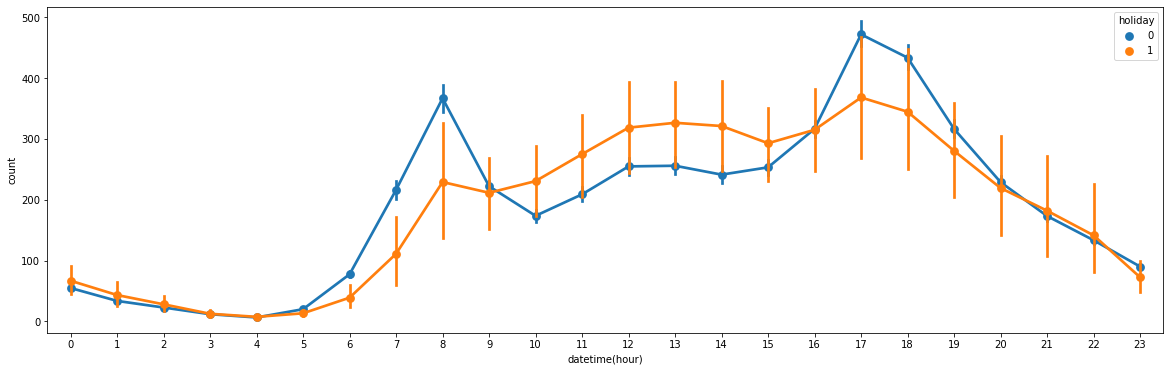

In [41]:
plt.figure(figsize = (20, 6))
sns.pointplot(data = train, x = "datetime(hour)", y = "count", hue = "holiday")

In [42]:
train["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [43]:
train["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

- 공휴일은 주말 토요일,일요일과는 조금 다른 개념으로 보인다.
- 공휴일이 아닌 날에서 요일별로 데이터를 살펴보자

In [12]:
#### 공휴일이 아닌 날의 데이터

train["day_name"] = train["datetime"].dt.day_name()
train["weekday"] = train["datetime"].dt.weekday
normal_data = train[train["holiday"] == 0]
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,season(clean),season(clean2),season(1-2),season(3-4),season(5-6),season(7-8),season(9-10),season(11-12),day_name,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,4,1,True,False,False,False,False,False,Saturday,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,4,1,True,False,False,False,False,False,Saturday,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,4,1,True,False,False,False,False,False,Saturday,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,4,1,True,False,False,False,False,False,Saturday,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,4,1,True,False,False,False,False,False,Saturday,5


In [13]:
test["day_name"] = test["datetime"].dt.day_name()
test["weekday"] = test["datetime"].dt.weekday

<AxesSubplot:xlabel='datetime(hour)', ylabel='count'>

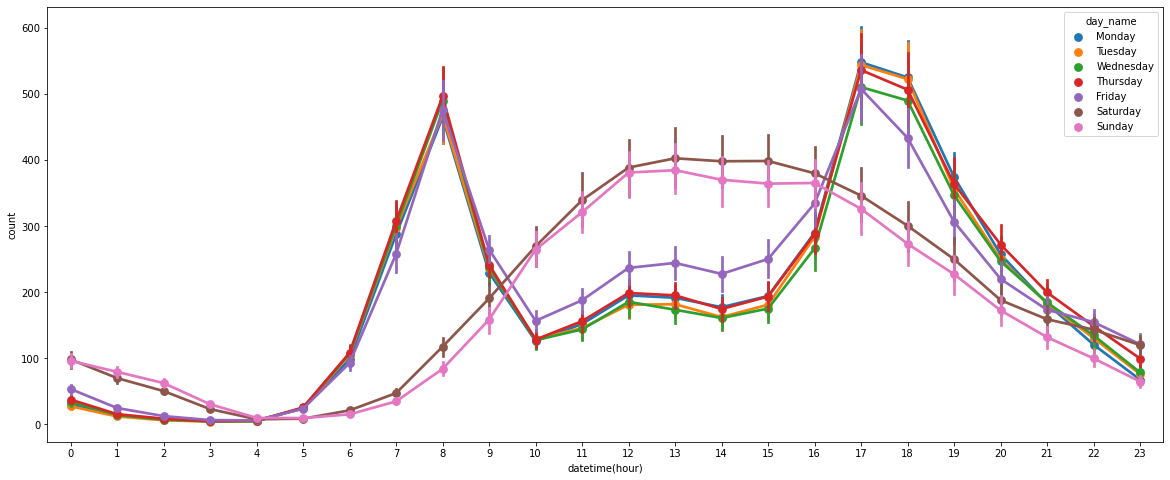

In [51]:
plt.figure(figsize = (20, 8))
day_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.pointplot(data = normal_data, x = "datetime(hour)", y = "count", hue = "day_name", hue_order = day_name)

- 금요일의 경우 오후타임에 대여량이 증가하며, 퇴근시간에 오히려 대여량이 준다
- 휴일 전이라 휴가를 쓰는 사람이 많고, 퇴근보다는 불금을 즐기는 인원의 영향도 있는 것으로 판단해볼 수 있다.
- 일요일은 토요일과 다르게 다음날의 영향이 있으므로 밤에 일찍 집에 들어가므로 대여량이 적다고 볼 수 있다.

In [170]:
train["day_name"].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [14]:
train["Monday"] = train["day_name"] == "Monday"
train["Tuesday"] = train["day_name"] == "Tuesday"
train["Wednesday"] = train["day_name"] == "Wednesday"
train["Thursday"] = train["day_name"] == "Thursday"
train["Friday"] = train["day_name"] == "Friday"
train["Saturday"] = train["day_name"] == "Saturday"
train["Sunday"] = train["day_name"] == "Sunday"

test["Monday"] = test["day_name"] == "Monday"
test["Tuesday"] = test["day_name"] == "Tuesday"
test["Wednesday"] = test["day_name"] == "Wednesday"
test["Thursday"] = test["day_name"] == "Thursday"
test["Friday"] = test["day_name"] == "Friday"
test["Saturday"] = test["day_name"] == "Saturday"
test["Sunday"] = test["day_name"] == "Sunday"

#### weather
- 날씨가 안좋으면 대여량이 줄어들 것이다.
- 숫자가 커질수록 날씨가 안좋은 경향이 나타난다.

<AxesSubplot:xlabel='weather', ylabel='count'>

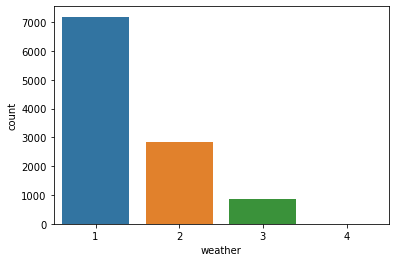

In [52]:
sns.countplot(data = train, x = "weather")

In [53]:
train["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='count'>

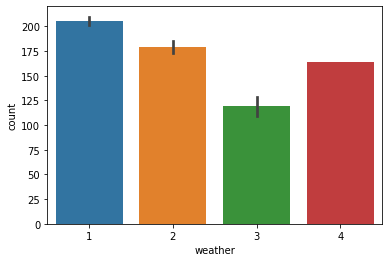

In [54]:
sns.barplot(data = train, x = "weather", y = "count")

- 예상과 다르게 날씨가 안좋은데 대여량이 매우 높은 수치가 나왔다.
- 하지만 신뢰구간이 없는 것, 4에 해당하는 모수가 1개로 매우 적기에 이것은 이상치로 볼 수 있다.
- 이상치를 처리해준 후 살펴보자

<AxesSubplot:xlabel='weather(clean)', ylabel='count'>

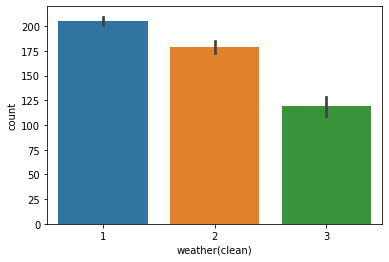

In [15]:
train["weather(clean)"] = train["weather"].replace(4, 3)
test["weather(clean)"] = test["weather"].replace(4, 3)
sns.barplot(data = train, x = "weather(clean)", y = "count")

In [63]:
test["weather(clean)"].value_counts()

1    4221
2    1710
3     562
Name: weather(clean), dtype: int64

In [16]:
train["weather(peace)"] = train["weather(clean)"] == 1
train["weather(cloud)"] = train["weather(clean)"] == 2
train["weather(rain)"] = train["weather(clean)"] == 3

test["weather(peace)"] = test["weather(clean)"] == 1
test["weather(cloud)"] = test["weather(clean)"] == 2
test["weather(rain)"] = test["weather(clean)"] == 3

#### temp, atemp, humidity, windspeed

- 온도, 체감온도가 높거나 너무낮으면 대여량이 줄어들 것이다.
- 습도가 높으면 짜증도 많이나고 날씨도 안좋으므로 대여량이 줄어들 것이다.
- 풍속이 높으면 자전거를 타기 어려우므로 대여량이 줄어들 것이다.
- 4가지모두 연속형이므로 정규분포를 따르며 outlier가 있다면 길쭉한 모양이 나타날 수 있다.

<AxesSubplot:xlabel='temp'>

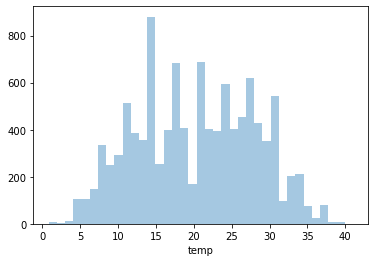

In [65]:
sns.distplot(train["temp"], kde = False)

<AxesSubplot:xlabel='atemp'>

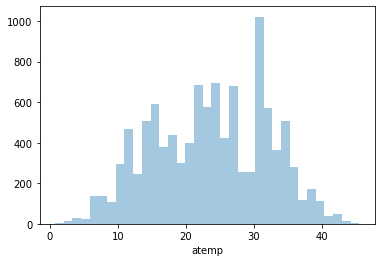

In [68]:
sns.distplot(train["atemp"], kde = False)

In [69]:
train["temp"].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [70]:
train["atemp"].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

- 온도, 체감온도 모두 완전 연속형은 아니고 끊어져있다. 반올림 한 후 데이터의 분포도를 확인해보자

<AxesSubplot:xlabel='temp(clean)', ylabel='count'>

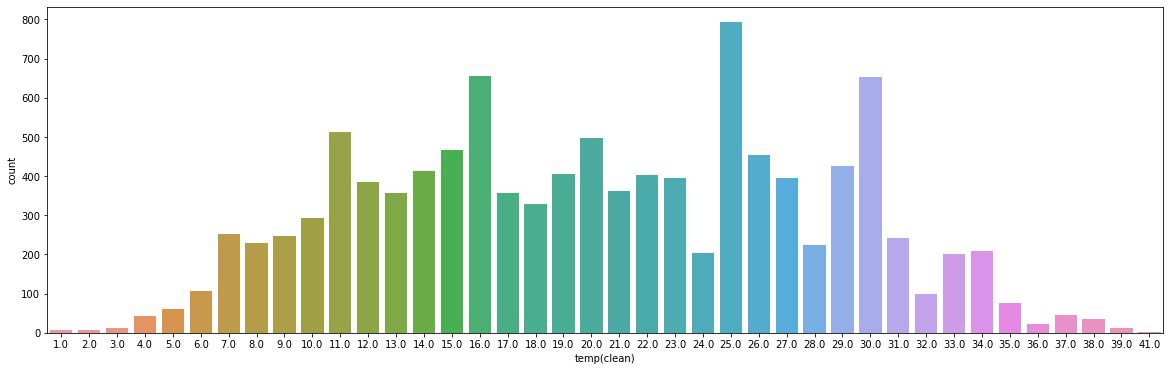

In [17]:
train["temp(clean)"] = round(train["temp"])
test["temp(clean)"] = round(train["temp"])
plt.figure(figsize = (20, 6))
sns.countplot(data = train , x = "temp(clean)")

<AxesSubplot:xlabel='atemp(clean)', ylabel='count'>

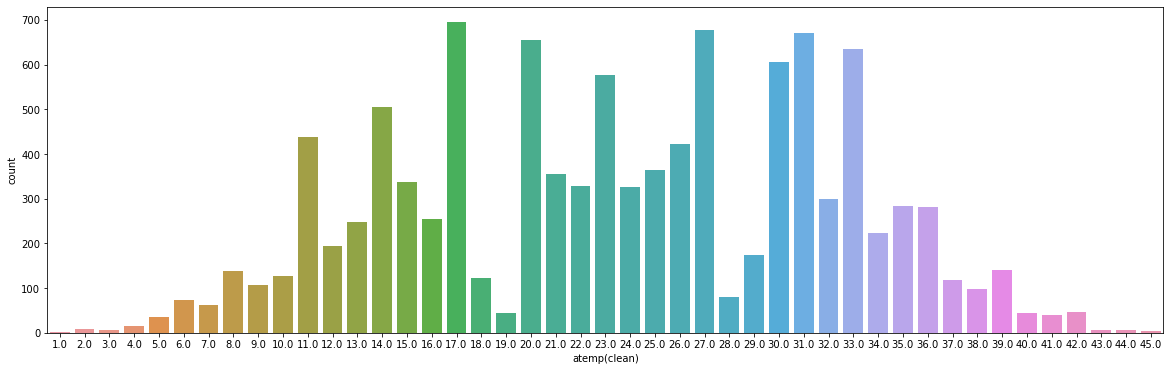

In [18]:
train["atemp(clean)"] = round(train["atemp"])
test["atemp(clean)"] = round(train["atemp"])
plt.figure(figsize = (20, 6))
sns.countplot(data = train , x = "atemp(clean)")

<AxesSubplot:xlabel='temp', ylabel='atemp'>

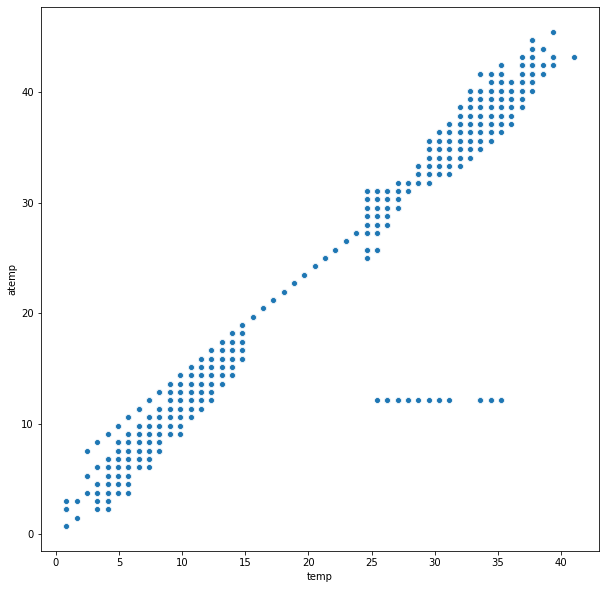

In [75]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = train , x = "temp", y = "atemp")

In [19]:
train["temp-atemp"] = round(train["temp"] - train["atemp"])
test["temp-atemp"] = round(test["temp"] - test["atemp"])
train["temp-atemp"].value_counts()

-4.0     5214
-3.0     1926
-2.0     1331
-5.0     1106
-1.0      581
-6.0      448
-0.0      195
-7.0       32
 1.0       23
 14.0       5
 22.0       5
 2.0        4
 15.0       3
 16.0       3
-8.0        2
 17.0       2
 23.0       2
 18.0       2
 13.0       1
 19.0       1
Name: temp-atemp, dtype: int64

- 온도와 체감온도 관계를 보면 전체적으로 비슷한 경향을 나타내지만 outlier들이 존재한다.
- 따라서 outlier들을 제거해준 후 대여량을 살펴보자
- outlier는 1이상, -7이하이므로 이것을 합쳐주자

<AxesSubplot:xlabel='temp-atemp', ylabel='count'>

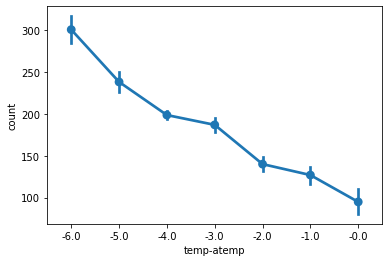

In [20]:
train.loc[train["temp-atemp"] > 0, "temp-atemp"] = 0
train.loc[train["temp-atemp"] < -6, "temp-atemp"] = -6
test.loc[test["temp-atemp"] > 0, "temp-atemp"] = 0
test.loc[test["temp-atemp"] < -6, "temp-atemp"] = -6

sns.pointplot(data = train , x = "temp-atemp", y = "count")

<AxesSubplot:xlabel='humidity'>

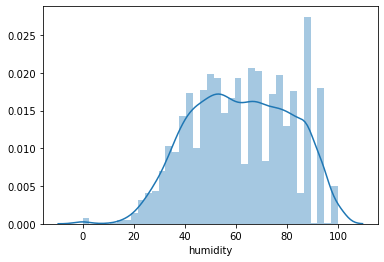

In [89]:
sns.distplot(train["humidity"])

In [93]:
train["humidity"].unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91], dtype=int64)

<AxesSubplot:xlabel='humidity', ylabel='count'>

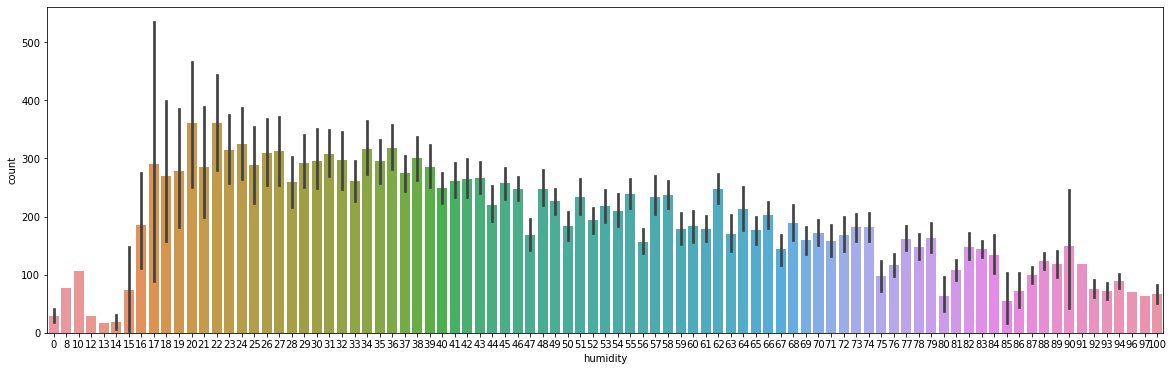

In [97]:
plt.figure(figsize = (20, 6))
sns.barplot(data = train , x = "humidity", y = "count")

- 오히려 습도가 매우 낮은 경우 대여량이 급격하게 줄어들지만 모수가 매우 적다는 점에서 신뢰도가 높지않다.
- 전체적으로 봤을 때 습도가 높을 수록 대여량이 줄어드는 경향이 나타난다.
- 모수가 적으므로 습도를 20단위로 끊어서 그룹화한 후 시각화하는 것이 예측하기도 좋다고 본다.

<AxesSubplot:xlabel='humidity(clean)', ylabel='count'>

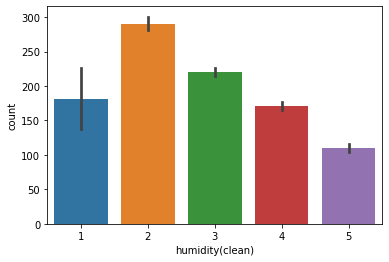

In [21]:
def clean_humidity(humidity):
    if humidity <= 20:
        return 1
    elif humidity <= 40:
        return 2
    elif humidity <= 60:
        return 3
    elif humidity <= 80:
        return 4
    else:
        return 5
    
train["humidity(clean)"] = train["humidity"].apply(clean_humidity)
test["humidity(clean)"] = test["humidity"].apply(clean_humidity)
sns.barplot(data = train, x = "humidity(clean)", y = "count")

In [128]:
train["windspeed"].unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

- 풍속 데이터의 경우 소수점이 깔끔하지 않다. 반올림하여 예쁘게 만들어준 후 경향성을 확인하자

In [22]:
train["windspeed(clean)"] = round(train["windspeed"])
test["windspeed(clean)"] = round(test["windspeed"])

<AxesSubplot:xlabel='windspeed(clean)'>

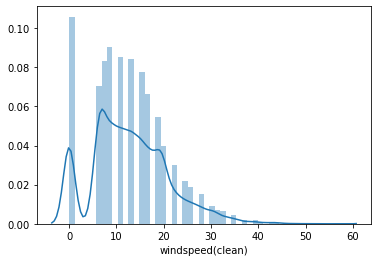

In [130]:
sns.distplot(train["windspeed(clean)"])

- 이상하게도 windspeed가 0인 경우가 매우 많다. 이것은 6보다 작은경우 측정이 안되거나 측정불가 두가지 경우이다.

<AxesSubplot:xlabel='weather(clean)', ylabel='count'>

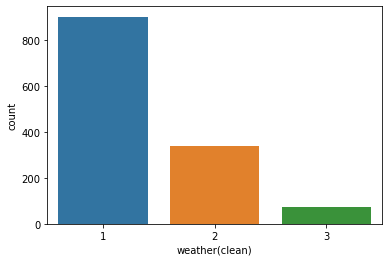

In [131]:
train_wind0 = train[train["windspeed(clean)"] == 0]

sns.countplot(data = train_wind0, x = "weather(clean)")

- 따라서 windspeed를 조정해줄 필요가 있다. 따라서 위와 아래 의 풍속의 평균으로 바꿔주면 보정이 가능하리라 본다.

In [23]:
train["windspeed(clean)"] = (((train["windspeed(clean)"].shift(-1).fillna(train["windspeed(clean)"])) + 
                             (train["windspeed(clean)"].shift(1).fillna(train["windspeed(clean)"]))) / 2) 
test["windspeed(clean)"] = (((test["windspeed(clean)"].shift(-1).fillna(test["windspeed(clean)"])) + 
                            (test["windspeed(clean)"].shift(1).fillna(test["windspeed(clean)"]))) / 2) 

<AxesSubplot:xlabel='windspeed(clean)', ylabel='count'>

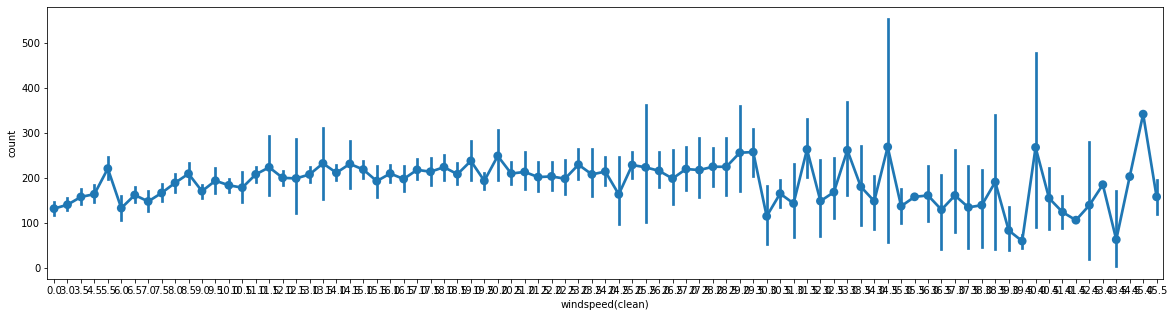

In [133]:
plt.figure(figsize = (20 , 5))
sns.pointplot(data = train, x = "windspeed(clean)", y = "count")

- 풍속이 너무 높으면(30이상) 대여량이 낮은 경향이 있지만 모수가 적어 신뢰도가 떨어진다.

In [24]:
train["windspeed(clean)"] = round(train["windspeed(clean)"])
test["windspeed(clean)"] = round(test["windspeed(clean)"])

<AxesSubplot:xlabel='windspeed(clean)', ylabel='count'>

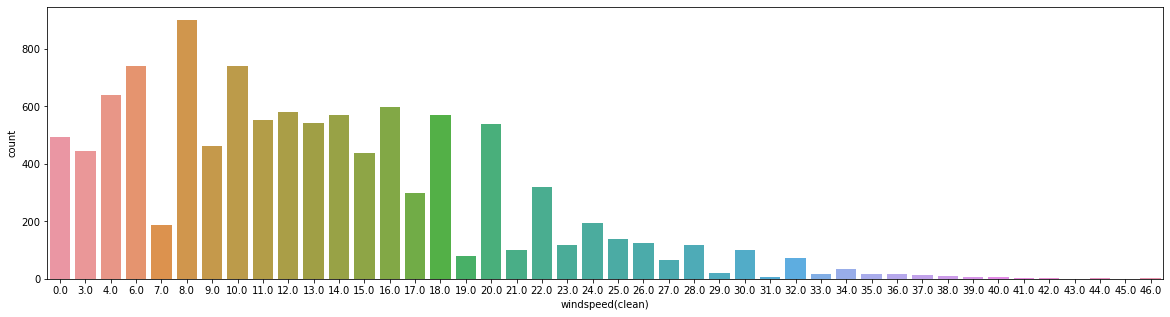

In [25]:
plt.figure(figsize = (20 , 5))
sns.countplot(data = train, x = "windspeed(clean)")

- 모수가 적으므로 풍속에 따른 레벨을 바탕으로 적절한 그룹화를 해주자
- 안전 : 0 - 8 m/s,
- 강한바람 : 8 - 14 m/s
- 강풍주의보 : 14 - 17 m/s
- 약태풍: 17 - 25 m/s
- 중태풍 : 25 - 33 m/s
- 강태풍 : 33 - 44m/s 
- 초강태풍 : 44 - m/s
- 출처 : 기상청

- 주의!! 워싱턴 mph를 단위로 쓰므로 환산해줄것! 1m/s = 0.44704mph

In [26]:
def clean_windspeed(windspeed):
    if windspeed <= 8 * 0.44704:
        return 1
    elif windspeed <= 14 * 0.44704:
        return 2
    elif windspeed <= 17 * 0.44704:
        return 3
    elif windspeed <= 25 * 0.44704:
        return 4
    elif windspeed <= 33 * 0.44704:
        return 5
    elif windspeed <= 44 * 0.44704:
        return 6
    else:
        return 7

train["windspeed(level)"] = train["windspeed(clean)"].apply(clean_windspeed)
test["windspeed(level)"] = test["windspeed(clean)"].apply(clean_windspeed)

<AxesSubplot:xlabel='windspeed(level)', ylabel='count'>

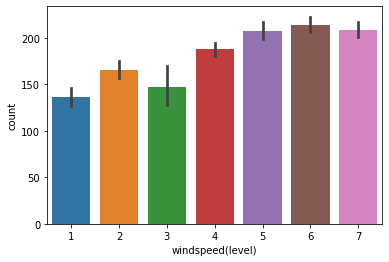

In [27]:
sns.barplot(data = train, x = "windspeed(level)", y = "count")

- 바람이 강한데 오히려 자전거 대여량이 증가한다. 날씨 계절과 함께 살펴보자

<AxesSubplot:xlabel='windspeed(level)', ylabel='count'>

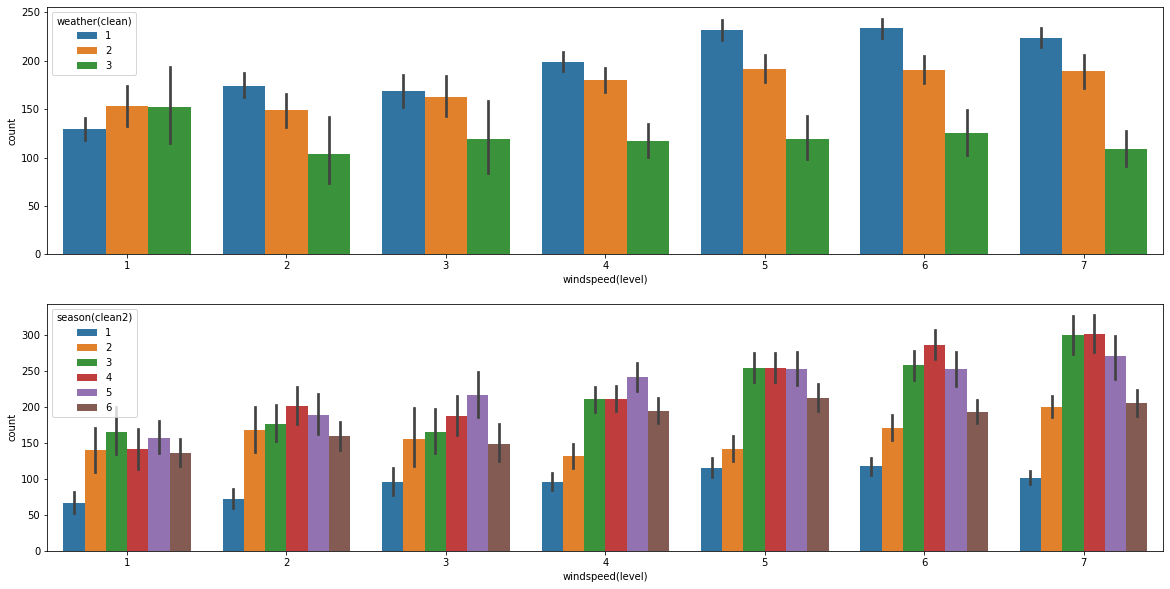

In [145]:
figure, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2)
figure.set_size_inches(20 ,10)
sns.barplot(data = train, x = "windspeed(level)", y = "count", hue = "weather(clean)", ax = ax1)
sns.barplot(data = train, x = "windspeed(level)", y = "count", hue = "season(clean2)", ax = ax2)

- 날씨가 좋다면 풍속이 높을수록 대여량이 높지만, 날씨가 안좋으면 풍속에 상관없이 영향이 적다
- season과 풍속은 그리 큰 관계를 찾기 어렵다
- 워싱턴사람들은 바람을 즐기는것 같다......(다른 요소와 함께 살펴봐야 할 것이다.)

#### 불쾌지수, 열지수

- 기상지수 중 불쾌지수, 열지수를 계산해보자
- 여름에 의미있는 데이터이므로 6789월에 대해서 확인해보자
- 지수가 높다면 대여량은 줄어들것이다!

- 열지수 : double HI = (-42.379 + (2.04901523 * F) + (10.14333127 * R) – (0.22475541 * F * R) – (0.00683770 * F * F) – (0.05481717 * R * R) + (0.00122874 * F * F * R) + (0.00085282 * F * R * R) – (0.00000199 * F * F * R * R));
- F = (T * 1.8) + 32; // 화씨를 섭씨온도로 변환



- 불쾌지수 : 1.4 * T - 0.55 (1 - 0.01 * humidity) * (T - 14.5)

In [228]:
F = 1.8 * train["temp"] + 32
R = train["humidity"] * 0.01
train["HeatIndex"] = (-42.379 + (2.04901523 * F) + (10.14333127 * R) - (0.22475541 * F * R) - (0.00683770 * F * F) - (0.05481717 * R * R) + (0.00122874 * F * F * R) + (0.00085282 * F * R * R) - (0.00000199 * F * F * R * R))

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,humidity(clean),windspeed(clean),windspeed(level),HeatIndex,Uncomfortable_Index,Uncomfortable_Index(clean),HeatIndex(clean),log(1+casual),log(1+registered),log(1+count)
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,5,0.0,1,44.197929,47.254,47.0,45.0,1.386294,2.639057,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,4,0.0,1,42.264986,46.074,46.0,42.0,2.197225,3.496508,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,4,0.0,1,42.264986,46.074,46.0,42.0,1.791759,3.332205,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,4,0.0,1,44.079141,47.650,48.0,44.0,1.386294,2.397895,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,4,3.0,1,44.079141,47.650,48.0,44.0,0.000000,0.693147,0.693147


In [229]:
round(train["HeatIndex"]).unique()

array([44., 42., 40., 52., 57., 55., 60., 63., 62., 59., 64., 58., 53.,
       51., 49., 45., 43., 41., 39., 36., 34., 35., 37., 38., 32., 46.,
       47., 33., 31., 29., 27., 30., 48., 50., 54., 25., 28., 56., 68.,
       71., 73., 74., 65., 70., 67., 78., 77., 76., 61., 66., 80., 81.,
       84., 85., 82., 89., 91., 93., 87., 86., 90., 92., 94., 95., 22.,
       20., 23., 96., 98.])

In [230]:
train["Uncomfortable_Index"] = train["temp"]-0.55*(1-0.01*train["humidity"])*(train["temp"]-14.5)

round(train["Uncomfortable_Index"]).unique()

array([10.,  9., 13., 15., 17., 18., 16., 19., 14., 12., 11.,  8.,  7.,
        6.,  5., 20., 21., 23., 22., 24., 26., 25., 27., 28., 29., 30.,
       31.])

In [231]:
F = 1.8 * test["temp"] + 32
R = test["humidity"] * 0.01
test["HeatIndex"] = (-42.379 + (2.04901523 * F) + (10.14333127 * R) - (0.22475541 * F * R) - (0.00683770 * F * F) - (0.05481717 * R * R) + (0.00122874 * F * F * R) + (0.00085282 * F * R * R) - (0.00000199 * F * F * R * R))

In [232]:
test["Uncomfortable_Index"] = test["temp"]-0.55*(1-0.01*test["humidity"])*(test["temp"]-14.5)

<AxesSubplot:xlabel='Uncomfortable_Index'>

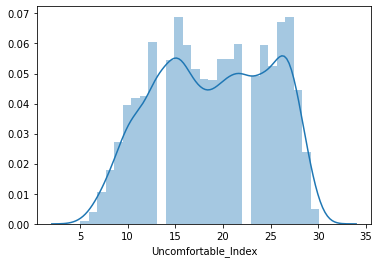

In [233]:
sns.distplot(round(train["Uncomfortable_Index"]))

In [234]:
train["Uncomfortable_Index(clean)"] = round(train["Uncomfortable_Index"])
train["HeatIndex(clean)"] = round(train["HeatIndex"])

In [235]:
test["Uncomfortable_Index(clean)"] = round(test["Uncomfortable_Index"])
test["HeatIndex(clean)"] = round(test["HeatIndex"])

<AxesSubplot:xlabel='HeatIndex(clean)', ylabel='count'>

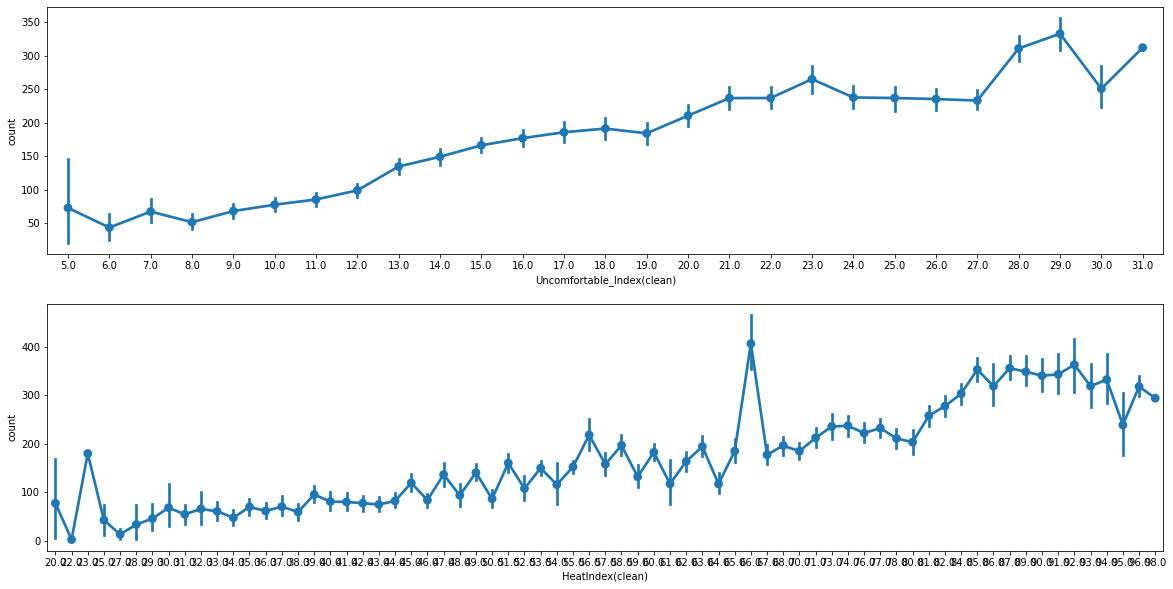

In [236]:
figure, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2)
figure.set_size_inches((20, 10))

sns.pointplot( data = train , x = "Uncomfortable_Index(clean)", y = "count", ax = ax1)
sns.pointplot( data = train , x = "HeatIndex(clean)", y = "count", ax = ax2)

- 불쾌지수가 높으면 오히려 자전거 대여량이 늘어난다. (스트레스해소에 오히려 도움이 되는듯 하다.)
- 열지수는 너무 높으면 대여량이 적은 경향이 있다.
- 이 두 지수는 날씨가 더운(6~9월 정도에 주로 활용되는 지수이므로 data를 축소해서 나타내보자)

In [238]:
train_69 = train[train["datetime(month)"].isin([6,7,8,9])]

<AxesSubplot:xlabel='HeatIndex(clean)', ylabel='count'>

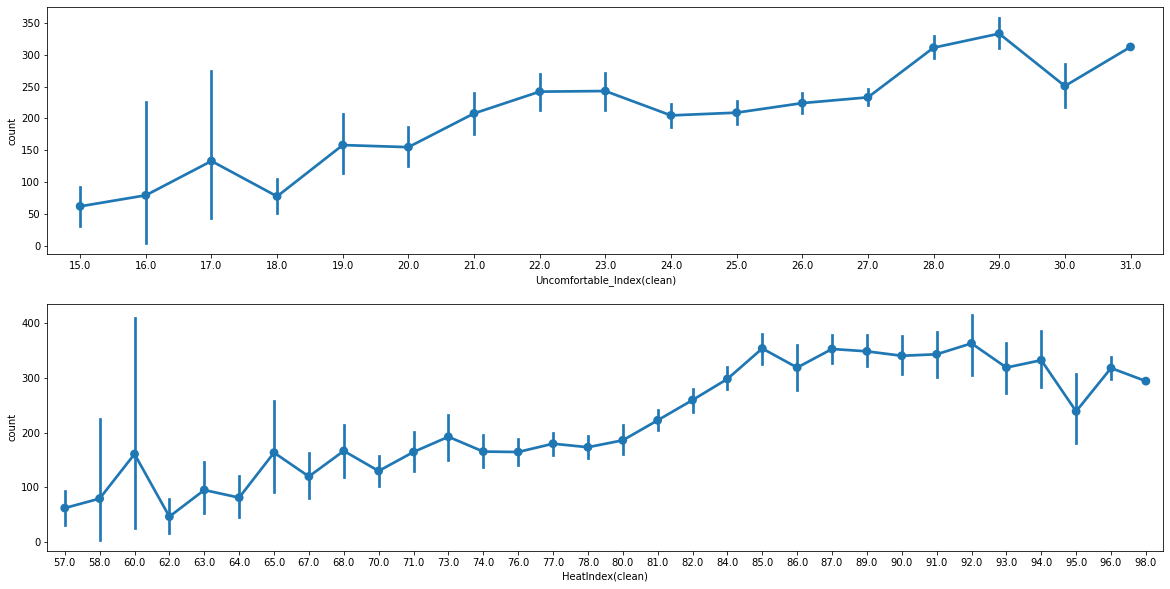

In [239]:
figure, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2)
figure.set_size_inches((20, 10))

sns.pointplot( data = train_69  , x = "Uncomfortable_Index(clean)", y = "count", ax = ax1)
sns.pointplot( data = train_69  , x = "HeatIndex(clean)", y = "count", ax = ax2)

- 불쾌지수, 열지수 모두 높을수록 대여량이 증가하는 경향을 나타내고 있다.

#### casual, registered
- 회원, 비회원의 대여량을 나타내는 것이다
- 회원은 정기적으로 자전거를 사용할 것이므로 대여량이 높을 것이다.
- 회원이라면 특정시간(ex. 출퇴근)에 대여량이 특히 높을 것이다.
- 따라서 근무일과 휴일에 따라 패턴이 달라질 것이다.
- 비회원은 필요할 때만 사용하므로 비교적 대여량이 적다.

<AxesSubplot:xlabel='datetime(hour)', ylabel='casual'>

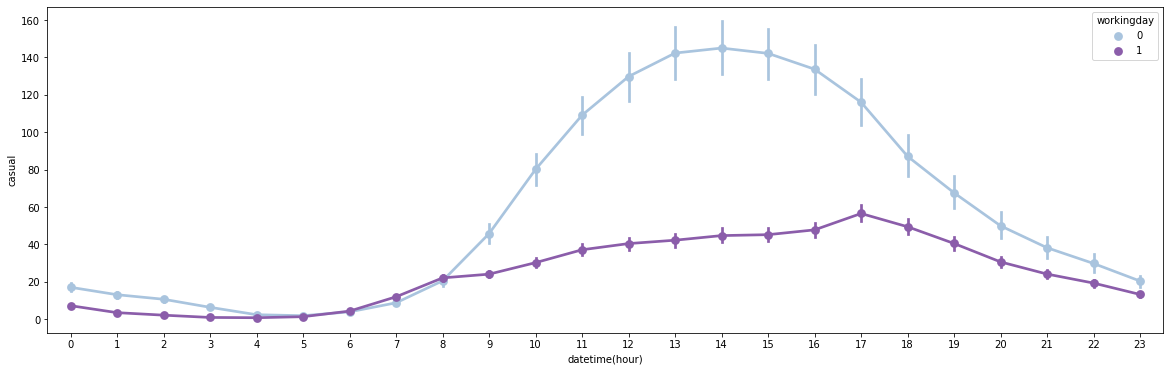

In [190]:
plt.figure(figsize = (20 , 6))
sns.pointplot(data = train, x = "datetime(hour)", y = "casual", palette = "BuPu", hue = "workingday")

<AxesSubplot:xlabel='datetime(hour)', ylabel='registered'>

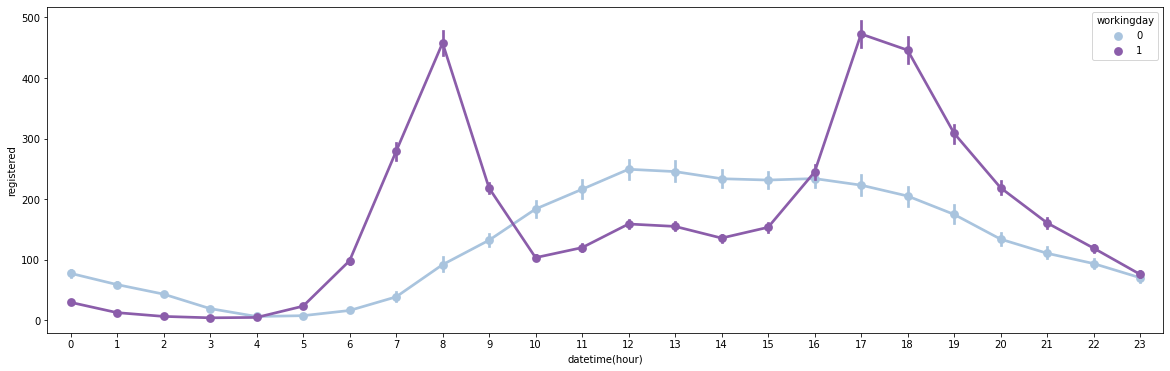

In [191]:
plt.figure(figsize = (20 , 6))
sns.pointplot(data = train, x = "datetime(hour)", y = "registered", palette = "BuPu", hue = "workingday")

- 비회원의 경우 근무일에는 사용량이 그리 높지 않으며, 근무일이 아닌 경우 휴일과 비슷한 패턴을 보인다.
- 회원의 경우 근무일에는 출퇴근시간, 휴일에는 오후타임에 대여량이 높은편이다

<AxesSubplot:xlabel='datetime(month)', ylabel='registered'>

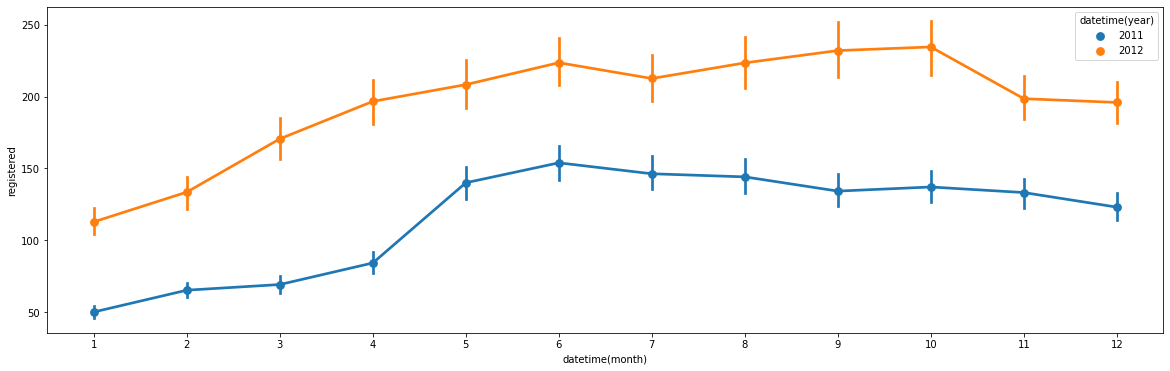

In [192]:
plt.figure(figsize = (20, 6))
sns.pointplot(data = train, x = "datetime(month)", y = "registered", hue = "datetime(year)")

<AxesSubplot:xlabel='datetime(month)', ylabel='casual'>

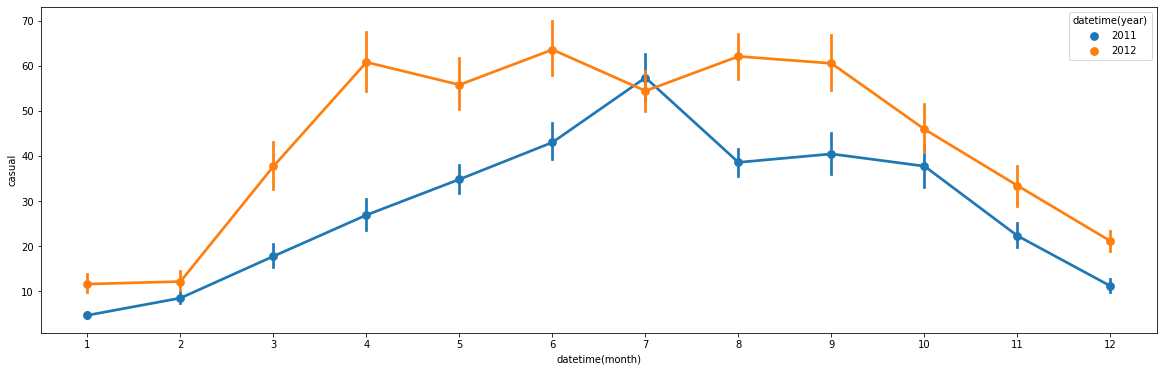

In [193]:
plt.figure(figsize = (20, 6))
sns.pointplot(data = train, x = "datetime(month)", y = "casual", hue = "datetime(year)")

- 이 기업은 비회원보다 회원의 성장세가 두드러 진다
- 7월은 비슷한 경향을 보이는 것은 주목할만한 사항이다

<AxesSubplot:xlabel='season(clean2)', ylabel='registered'>

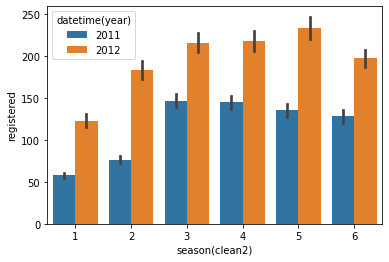

In [196]:
sns.barplot(data = train, x = "season(clean2)", y = "registered", hue = "datetime(year)")

<AxesSubplot:xlabel='season(clean2)', ylabel='casual'>

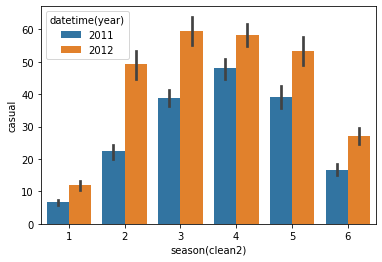

In [197]:
sns.barplot(data = train, x = "season(clean2)", y = "casual", hue = "datetime(year)")

<AxesSubplot:xlabel='datetime(hour)', ylabel='registered'>

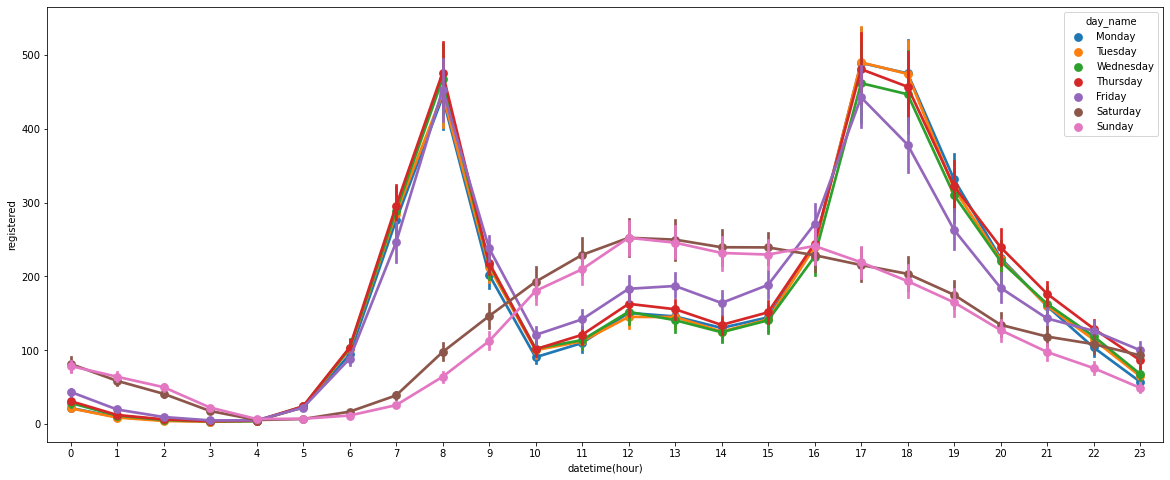

In [198]:
plt.figure(figsize = (20, 8))
day_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.pointplot(data = normal_data, x = "datetime(hour)", y = "registered", hue = "day_name", hue_order = day_name)

- 회원은 전체적으로 count와 비슷한경향을 보인다.
- 비회원의 대여량이 상대적으로 적기때문이다.

<AxesSubplot:xlabel='datetime(hour)', ylabel='casual'>

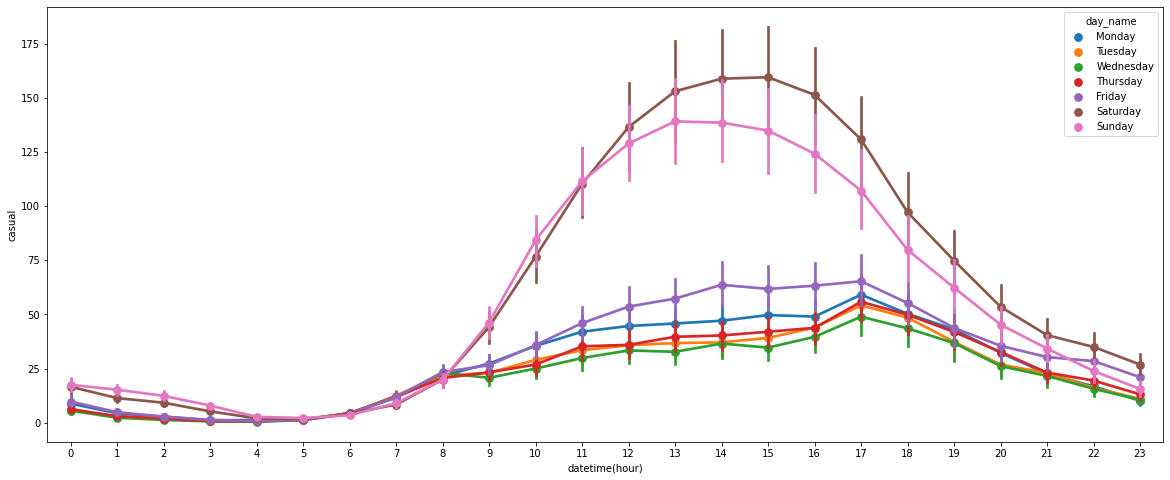

In [199]:
plt.figure(figsize = (20, 8))
day_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.pointplot(data = normal_data, x = "datetime(hour)", y = "casual", hue = "day_name", hue_order = day_name)

- 비회원의 경우 경향성이 다르게 나타난다.
- 특히 금, 토요일의 대여량이 높다.

<AxesSubplot:xlabel='weather(clean)', ylabel='casual'>

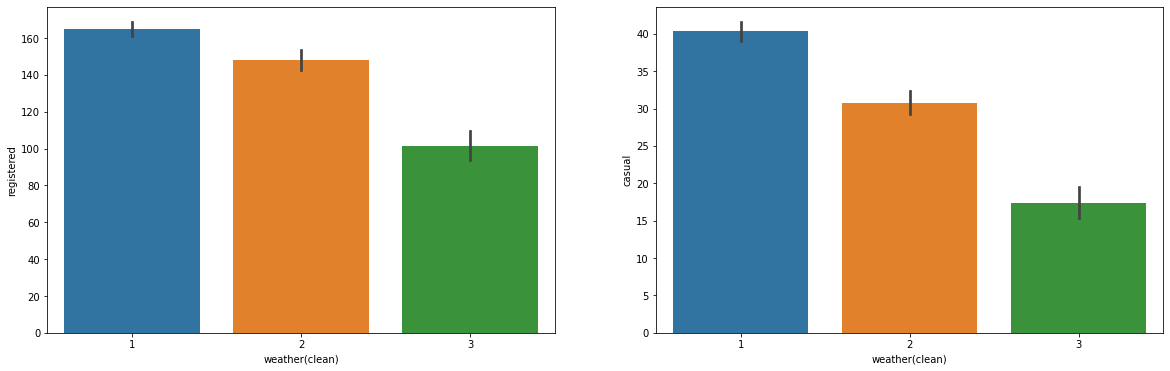

In [202]:
figure, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)
figure.set_size_inches(20 ,6)
sns.barplot(data = train ,x = "weather(clean)", y = "registered", ax = ax1)
sns.barplot(data = train ,x = "weather(clean)", y = "casual", ax = ax2)

- 비슷한 경향을 보이며, registered, casual의 비율이 차이가 나는것을 확인할 수 있다.

<AxesSubplot:xlabel='temp(clean)', ylabel='casual'>

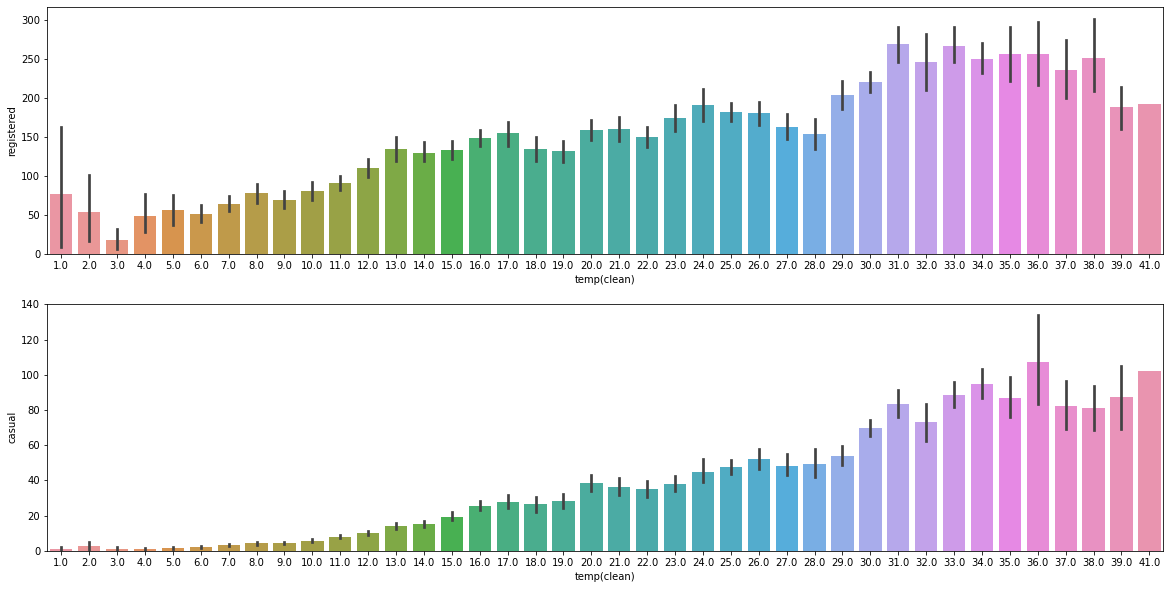

In [204]:
figure, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2)
figure.set_size_inches(20 ,10)
sns.barplot(data = train ,x = "temp(clean)", y = "registered", ax = ax1)
sns.barplot(data = train ,x = "temp(clean)", y = "casual", ax = ax2)

<AxesSubplot:xlabel='atemp(clean)', ylabel='casual'>

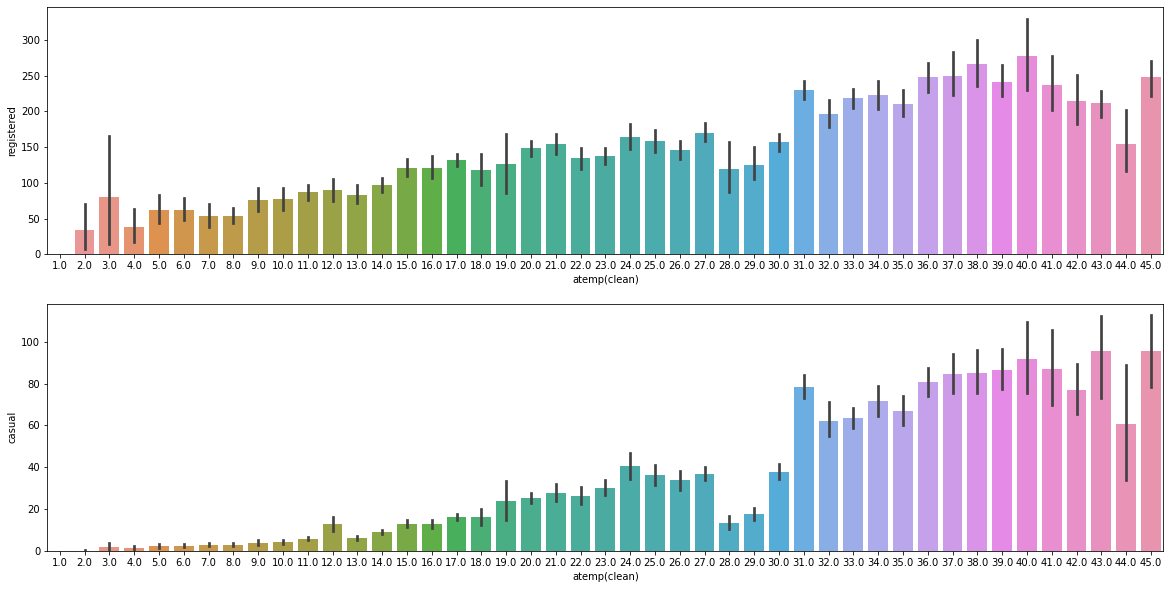

In [208]:
figure, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2)
figure.set_size_inches(20 ,10)
sns.barplot(data = train ,x = "atemp(clean)", y = "registered", ax = ax1)
sns.barplot(data = train ,x = "atemp(clean)", y = "casual", ax = ax2)

<AxesSubplot:xlabel='temp-atemp', ylabel='casual'>

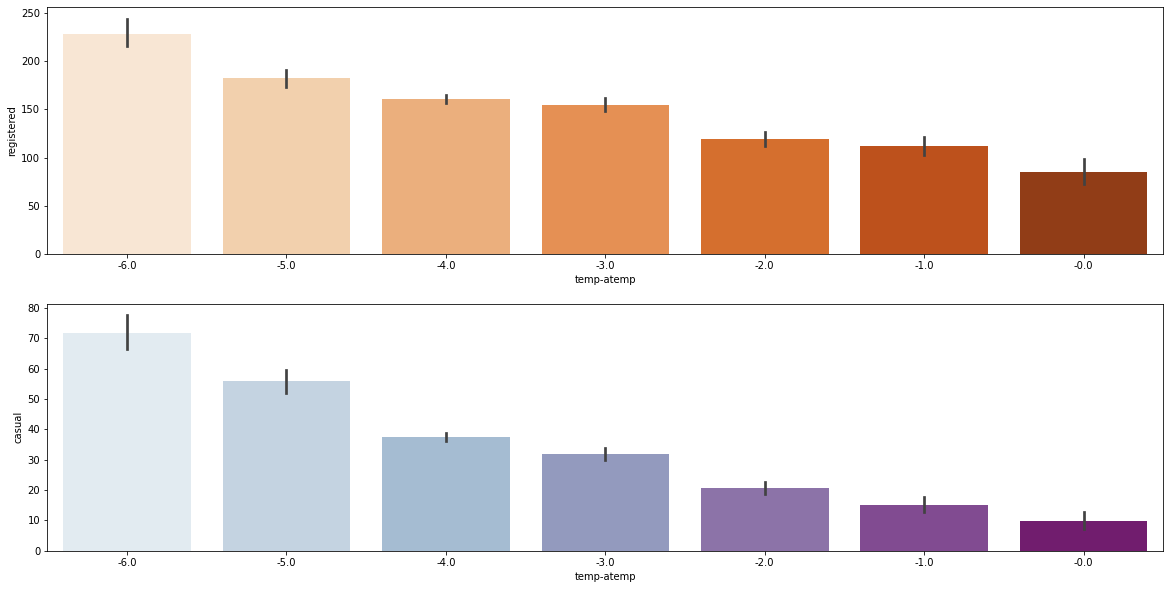

In [207]:
figure, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2)
figure.set_size_inches(20 ,10)
sns.barplot(data = train ,x = "temp-atemp", y = "registered", ax = ax1, palette = "Oranges")
sns.barplot(data = train ,x = "temp-atemp", y = "casual", ax = ax2, palette = "BuPu")

<AxesSubplot:xlabel='HeatIndex(clean)', ylabel='casual'>

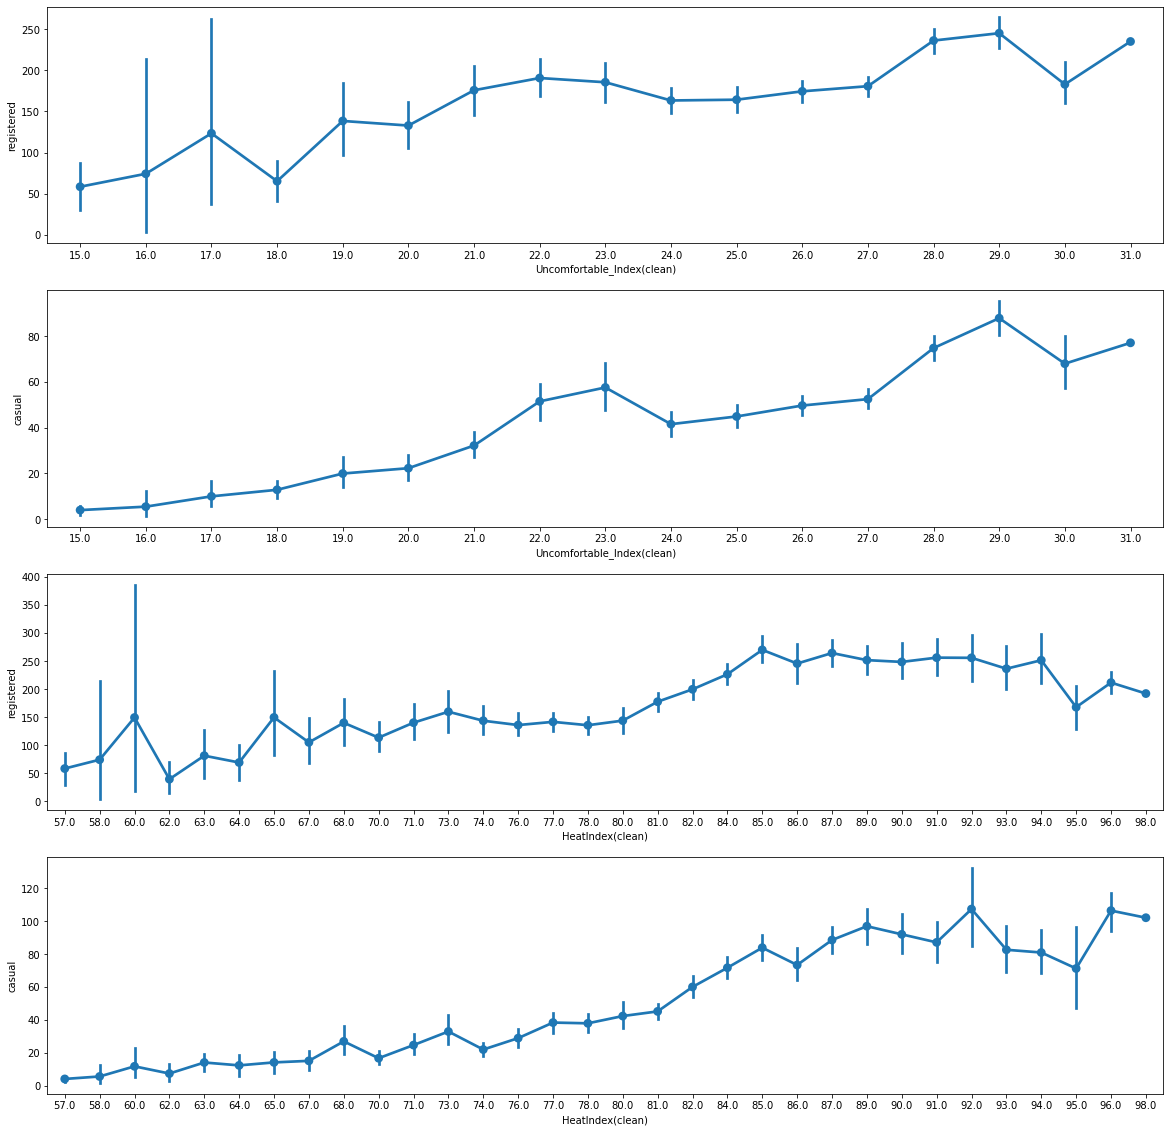

In [240]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 1, nrows = 4)
figure.set_size_inches((20, 20))

sns.pointplot( data = train_69 , x = "Uncomfortable_Index(clean)", y = "registered", ax = ax1)
sns.pointplot( data = train_69 , x = "Uncomfortable_Index(clean)", y = "casual", ax = ax2)
sns.pointplot( data = train_69 , x = "HeatIndex(clean)", y = "registered", ax = ax3)
sns.pointplot( data = train_69 , x = "HeatIndex(clean)", y = "casual", ax = ax4)

<AxesSubplot:xlabel='humidity(clean)', ylabel='casual'>

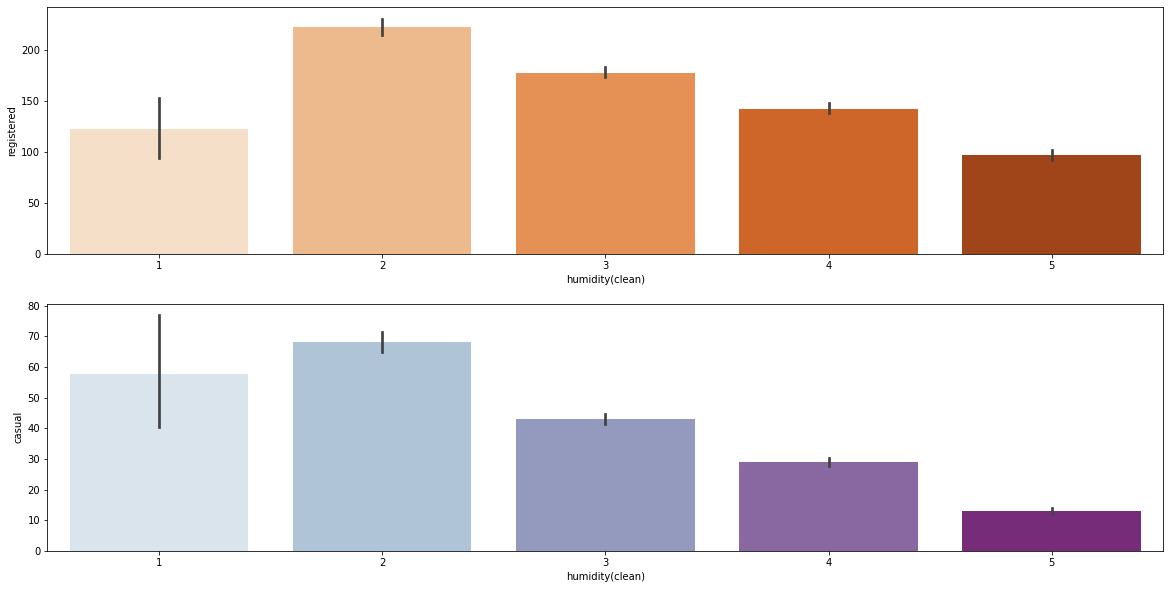

In [213]:
figure, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2)
figure.set_size_inches(20 ,10)
sns.barplot(data = train ,x = "humidity(clean)", y = "registered", ax = ax1, palette = "Oranges")
sns.barplot(data = train ,x = "humidity(clean)", y = "casual", ax = ax2, palette = "BuPu")

<AxesSubplot:xlabel='windspeed(clean)', ylabel='casual'>

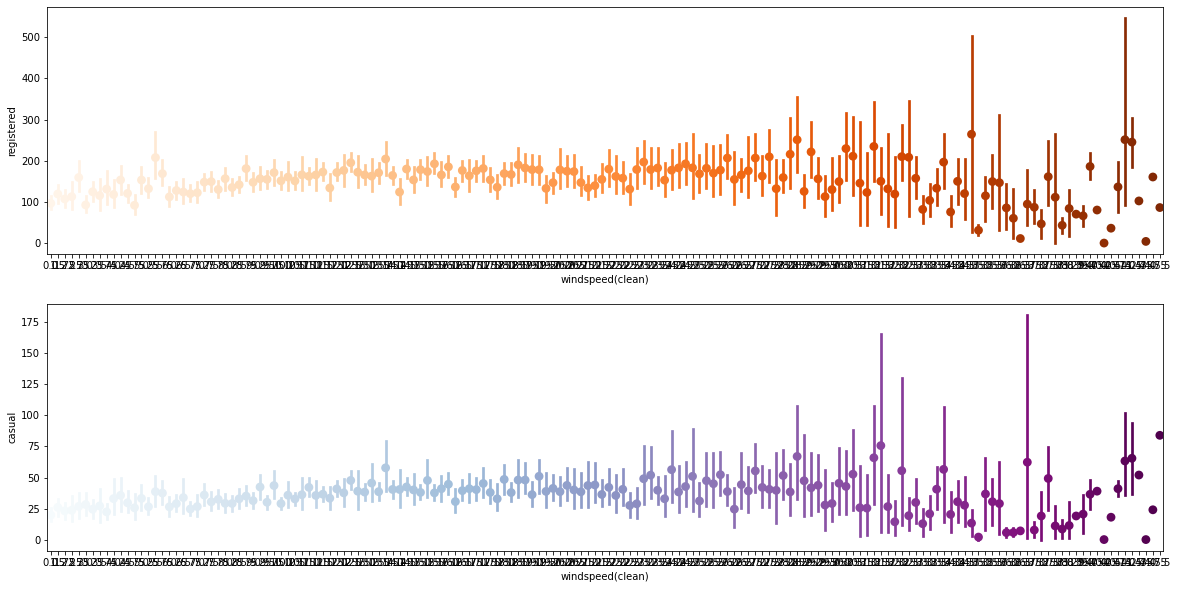

In [215]:
figure, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2)
figure.set_size_inches(20 ,10)
sns.pointplot(data = train ,x = "windspeed(clean)", y = "registered", ax = ax1, palette = "Oranges")
sns.pointplot(data = train ,x = "windspeed(clean)", y = "casual", ax = ax2, palette = "BuPu")

<AxesSubplot:xlabel='windspeed(level)', ylabel='casual'>

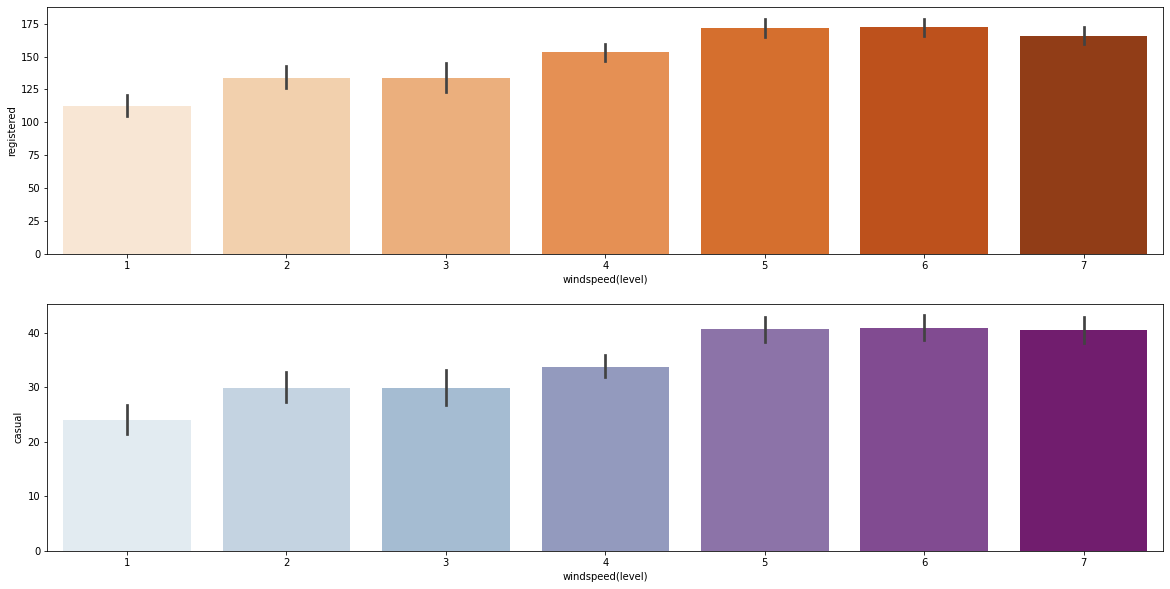

In [218]:
figure, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2)
figure.set_size_inches(20 ,10)
sns.barplot(data = train ,x = "windspeed(level)", y = "registered", ax = ax1, palette = "Oranges")
sns.barplot(data = train ,x = "windspeed(level)", y = "casual", ax = ax2, palette = "BuPu")

- 나머지 요소들은 대부분 비슷한 경향을 보인다.
- 따라서 datetime(hour), 요일별로 다른 경향이 나타난다.
- count = registered + casual 이므로 registered, casual을 따로 예측하여 둘을 합해주는 방법으로 구하자

In [218]:
import numpy as np
train["log(1+casual)"] = np.log(1+train["casual"])
train["log(1+registered)"] = np.log(1+train["registered"])
train["log(1+count)"]=np.log(1+train["count"])

### USE RF & GBM 검정 및 사용
- 캐글에서 예측을 위한 통계적 추정 공식은 RMSLE 이다.
- 따라서 log scale로 fit하여 predict한 후 변환하는 방법으로 구하자
- registered, casual 각각 구하여 합하는 방법으로 구하고, count를 구한 후 둘의 기하평균으로 구하자

In [363]:
feature_names = ["datetime(year)", "datetime(hour)",
                 "workingday", "holiday",
                "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", 
                 "weather(peace)","weather(cloud)", "weather(rain)", 
                 "temp(clean)", "atemp(clean)", "temp-atemp", "humidity",
                 "windspeed(clean)", "Uncomfortable_Index(clean)", "HeatIndex(clean)", 
                 "spring", "summer", "fall", "winter", "season(7-8)"
                ]
feature_names

['datetime(year)',
 'datetime(hour)',
 'workingday',
 'holiday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'weather(peace)',
 'weather(cloud)',
 'weather(rain)',
 'temp(clean)',
 'atemp(clean)',
 'temp-atemp',
 'humidity',
 'windspeed(clean)',
 'Uncomfortable_Index(clean)',
 'HeatIndex(clean)',
 'spring',
 'summer',
 'fall',
 'winter',
 'season(7-8)']

In [38]:
label1 = "registered"
label2 = "casual"

In [242]:
X_train = train[feature_names]
X_train.head(3)

,datetime(year),datetime(hour),spring,summer,fall,winter,season(5-6),season(7-8),workingday,holiday,...,weather(cloud),weather(rain),temp(clean),atemp(clean),temp-atemp,humidity(clean),windspeed(clean),windspeed(level),Uncomfortable_Index(clean),HeatIndex(clean)
0,2011,0,True,False,False,False,False,False,0,0,...,False,False,10.0,14.0,-5.0,5,0.0,1,10.0,44.0
1,2011,1,True,False,False,False,False,False,0,0,...,False,False,9.0,14.0,-5.0,4,0.0,1,10.0,42.0
2,2011,2,True,False,False,False,False,False,0,0,...,False,False,9.0,14.0,-5.0,4,0.0,1,10.0,42.0


In [243]:
X_test = test[feature_names]
X_test.head(3)

,datetime(year),datetime(hour),spring,summer,fall,winter,season(5-6),season(7-8),workingday,holiday,...,weather(cloud),weather(rain),temp(clean),atemp(clean),temp-atemp,humidity(clean),windspeed(clean),windspeed(level),Uncomfortable_Index(clean),HeatIndex(clean)
0,2011,0,True,False,False,False,False,False,1,0,...,False,False,10.0,14.0,-1.0,3,13.0,5,12.0,46.0
1,2011,1,True,False,False,False,False,False,1,0,...,False,False,9.0,14.0,-3.0,3,13.0,5,12.0,46.0
2,2011,2,True,False,False,False,False,False,1,0,...,False,False,9.0,14.0,-3.0,3,6.0,2,12.0,46.0


In [244]:
y_train_count = train["log(1+count)"]
y_train_registered = train["log(1+registered)"]
y_train_casual = train["log(1+casual)"]

In [43]:
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_predict

from sklearn.metrics import mean_squared_log_error

In [246]:
n_estimators = 10
num_loop = 10

for loop in range(num_loop) : 
    max_depth = np.random.randint(2,100)
    max_features = np.random.uniform(0.1,1.0)

    
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)
    
    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)
    
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1
    
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)
    
    score = mean_squared_log_error(y_train_count, y_predict)
    score = np.sqrt(score)
    
    print(f"n_estimators = {n_estimators}, max_depth = {max_depth}, max_features = {max_features : 6f}, Score(RMSLE) = {score: 5f}")
    

n_estimators = 10, max_depth = 61, max_features =  0.672790, Score(RMSLE) =  0.365278
n_estimators = 10, max_depth = 35, max_features =  0.901565, Score(RMSLE) =  0.358170
n_estimators = 10, max_depth = 40, max_features =  0.300668, Score(RMSLE) =  0.492143
n_estimators = 10, max_depth = 85, max_features =  0.335083, Score(RMSLE) =  0.434696
n_estimators = 10, max_depth = 39, max_features =  0.393787, Score(RMSLE) =  0.412427
n_estimators = 10, max_depth = 60, max_features =  0.888106, Score(RMSLE) =  0.358298
n_estimators = 10, max_depth = 82, max_features =  0.546692, Score(RMSLE) =  0.370386
n_estimators = 10, max_depth = 80, max_features =  0.676771, Score(RMSLE) =  0.365278
n_estimators = 10, max_depth = 28, max_features =  0.963719, Score(RMSLE) =  0.358292
n_estimators = 10, max_depth = 16, max_features =  0.342860, Score(RMSLE) =  0.433640


In [45]:
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_predict

from sklearn.metrics import mean_squared_log_error

n_estimators = 1000

num_epoch = 100

coarse_hyperparameters_list = []

for epoch in range(num_epoch):
    
    max_depth = np.random.randint(low = 2, high = 100)

    
    max_features = np.random.uniform(low = 0.1, high = 1.0)
    
    

   
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  
                                  n_jobs = -1,
                                  random_state = 37)

    
    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)

    
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)

    
    score = mean_squared_log_error(y_train_count, y_predict)
    score = np.sqrt(score)
    
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    
    coarse_hyperparameters_list.append(hyperparameters)

   
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")


coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")


print(coarse_hyperparameters_list.shape)

coarse_hyperparameters_list.head(10)

 0 n_estimators = 1000, max_depth = 68, max_features = 0.361298, Score = 0.41548
 1 n_estimators = 1000, max_depth = 27, max_features = 0.188382, Score = 0.53705
 2 n_estimators = 1000, max_depth = 19, max_features = 0.803758, Score = 0.34533
 3 n_estimators = 1000, max_depth = 59, max_features = 0.279972, Score = 0.45145
 4 n_estimators = 1000, max_depth = 45, max_features = 0.652759, Score = 0.35117
 5 n_estimators = 1000, max_depth = 23, max_features = 0.972187, Score = 0.34503
 6 n_estimators = 1000, max_depth = 80, max_features = 0.545182, Score = 0.36384
 7 n_estimators = 1000, max_depth = 47, max_features = 0.129444, Score = 0.63032
 8 n_estimators = 1000, max_depth = 50, max_features = 0.926780, Score = 0.34447
 9 n_estimators = 1000, max_depth = 40, max_features = 0.339560, Score = 0.41549
10 n_estimators = 1000, max_depth = 14, max_features = 0.619338, Score = 0.35684
11 n_estimators = 1000, max_depth = 32, max_features = 0.926085, Score = 0.34452
12 n_estimators = 1000, max_

,epoch,score,n_estimators,max_depth,max_features
55,55,0.344466,1000,78,0.916028
8,8,0.344466,1000,50,0.926780
11,11,0.344516,1000,32,0.926085
80,80,0.344562,1000,58,0.872024
74,74,0.344562,1000,47,0.877176
91,91,0.344562,1000,44,0.864815
84,84,0.344615,1000,40,0.886284
86,86,0.344615,1000,40,0.903429
35,35,0.344672,1000,17,0.900651
5,5,0.345035,1000,23,0.972187


In [305]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 1000,
                              max_depth = 78,
                              max_features = 0.916028,
                              n_jobs = -1,
                              random_state = 37)

In [364]:
import numpy as np
X_train = train[feature_names]
X_test = test[feature_names]
y_train_count = train["log(1+count)"]
y_train_registered = train["log(1+registered)"]
y_train_casual = train["log(1+casual)"]

In [365]:
model.fit(X_train,y_train_count)
prediction_list1 = model.predict(X_test)
prediction_list1

array([2.55227889, 1.68186702, 1.47219282, ..., 5.01367707, 4.77390209,
       4.1418123 ])

In [366]:
model.fit(X_train,y_train_registered)
prediction_list2 = model.predict(X_test)
prediction_list2

array([2.455989  , 1.65784132, 1.03421977, ..., 4.88207027, 4.66059984,
       3.98230909])

In [367]:
model.fit(X_train,y_train_casual)
prediction_list3 = model.predict(X_test)
prediction_list3

array([0.88633771, 0.45360348, 0.68978559, ..., 2.23337256, 1.98266358,
       1.62170374])

In [368]:
y_predict_casual = np.exp(prediction_list3) - 1
y_predict_registered = np.exp(prediction_list2) - 1
y_predict_count = np.exp(prediction_list1) - 1

In [369]:
y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)
y_predict

array([ 11.9596121 ,   4.59334458,   3.07008338, ..., 144.25533321,
       114.12578226,  59.25227074])

In [370]:
submit = pd.read_csv("sampleSubmission.csv")

submit["count"]= y_predict
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.959612
1,2011-01-20 01:00:00,4.593345
2,2011-01-20 02:00:00,3.070083
3,2011-01-20 03:00:00,2.760422
4,2011-01-20 04:00:00,2.068206


In [371]:
submit.to_csv("baseline-script.csv",index=False)